## Dimensionality Reduction
In this video we'll look at two statistical techniques for dimensionality reduction
1. PCA (Principal Component Analysis)
2. The importance of scaling your features for PCA
3. LDA (Linear Discriminant Analysis)


## load data

In [66]:
from sklearn.datasets import load_wine
data = load_wine()

In [67]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [68]:
import pandas as pd
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
X = df
y = data['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## PCA
Useful for either regression or classifcation problems, though PCA doesn't use class labels to maximise separability between classes

### PCA unscaled data...

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

*Percentage of variance explained by each of the selected components.*

In [70]:
print(pca.explained_variance_ratio_)

[0.99809123 0.00173592]


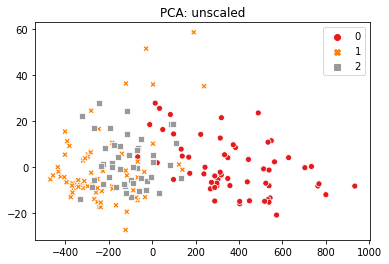

In [71]:
import seaborn as sns

_ = sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1],
                   hue=y, style=y, palette="Set1"
                   ).set_title("PCA: unscaled")

In [74]:
#df.describe().loc['max'].sort_values(ascending=False)

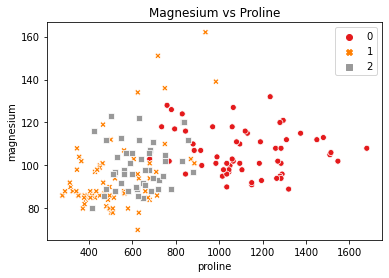

In [73]:
_ = sns.scatterplot(x=X['proline'], y=X['magnesium'], hue=y, 
                    style=y, palette="Set1" ).set_title("Magnesium vs Proline")

### PCA - Scaled data

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(std_scaled)

In [76]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749 ]


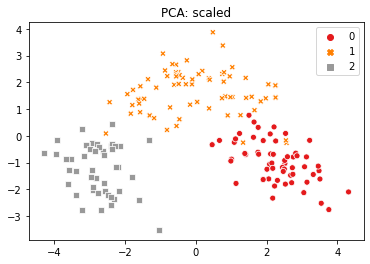

In [77]:
_ = sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1],
                   hue=y, style=y, palette="Set1"
                   ).set_title("PCA: scaled")

## Linear Discriminant Analysis
Suitable for Classification problems. Data is assumed to be gaussian. Class labels are used to maximise separability between classes

### LDA

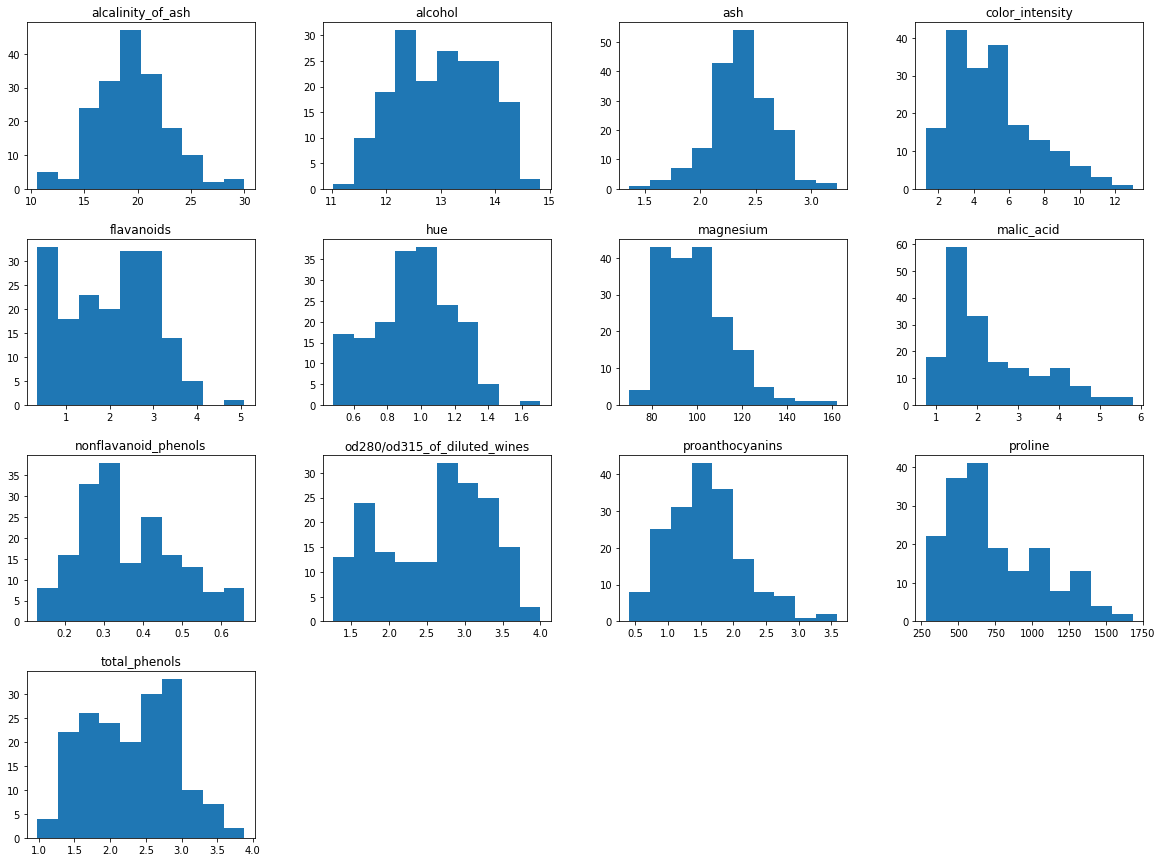

In [79]:
_ = df.hist(figsize=(20,15), grid=False)

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(X, y)

In [82]:
print(lda.explained_variance_ratio_)

[0.68747889 0.31252111]


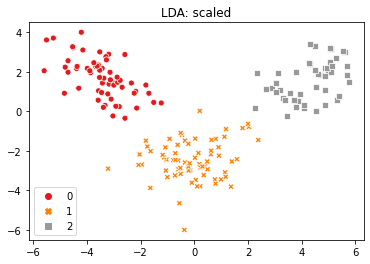

In [83]:
_ = sns.scatterplot(x=lda_components[:,0], y=lda_components[:,1],
                   hue=y, style=y, palette="Set1"
                   ).set_title("LDA: scaled")